# DSC 530 Final Project - Alexa Wittlieff

# Load Data, Select Variables

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import thinkstats2
import thinkplot

In [114]:
# Load Data
IMDB_df = pd.read_csv(r"imdb_top_1000_MASTER COPY.csv")

In [115]:
IMDB_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [116]:
# Selection of Variables
IMDB_df = IMDB_df[["Series_Title", "Released_Year", "Runtime", "IMDB_Rating", "Meta_score", "Gross"]]
pd.DataFrame.head(IMDB_df)

,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,Director,Gross
0,The Shawshank Redemption,1994,142 min,9.3,80.0,Frank Darabont,"28,341,469"
1,The Godfather,1972,175 min,9.2,100.0,Francis Ford Coppola,"134,966,411"
2,The Dark Knight,2008,152 min,9.0,84.0,Christopher Nolan,"534,858,444"
3,The Godfather: Part II,1974,202 min,9.0,90.0,Francis Ford Coppola,"57,300,000"
4,12 Angry Men,1957,96 min,9.0,96.0,Sidney Lumet,"4,360,000"


In [117]:
# View the df Types
IMDB_df.dtypes

Series_Title      object
Released_Year      int64
Runtime           object
IMDB_Rating      float64
Meta_score       float64
Director          object
Gross             object
dtype: object

# Create Histograms

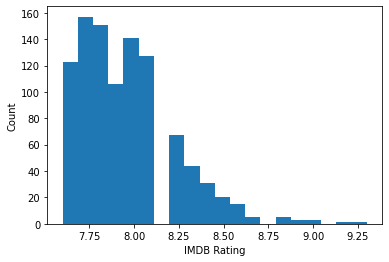

In [118]:
# Histogram of IMDB Ratings
plt.hist(IMDB_df.IMDB_Rating, density=False, bins=20)
plt.ylabel('Count')
plt.xlabel('IMDB Rating');

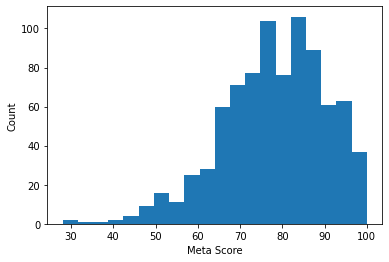

In [119]:
# Histogram of Meta Scores
plt.hist(IMDB_df.Meta_score, density=False, bins=20)
plt.ylabel('Count')
plt.xlabel('Meta Score');

In [120]:
# Remove "Min" from runtime column
IMDB_df['Runtime'] = IMDB_df['Runtime'].str.replace(' min', '')

# Validate Conversion
IMDB_df.head()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,Director,Gross
0,The Shawshank Redemption,1994,142,9.3,80.0,Frank Darabont,"28,341,469"
1,The Godfather,1972,175,9.2,100.0,Francis Ford Coppola,"134,966,411"
2,The Dark Knight,2008,152,9.0,84.0,Christopher Nolan,"534,858,444"
3,The Godfather: Part II,1974,202,9.0,90.0,Francis Ford Coppola,"57,300,000"
4,12 Angry Men,1957,96,9.0,96.0,Sidney Lumet,"4,360,000"


In [121]:
# Convert Runtime to Integer
IMDB_df['Runtime'] = IMDB_df['Runtime'].astype('int32')

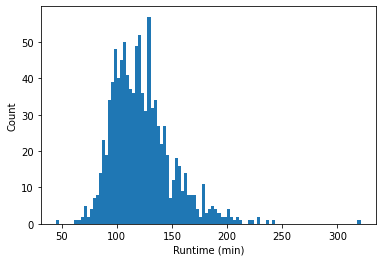

In [122]:
# Histogram of Runtime
plt.hist(IMDB_df.Runtime, density=False, bins=100)
plt.ylabel('Count')
plt.xlabel('Runtime (min)');

In [123]:
# Remove Comma from Gross Column
IMDB_df['Gross'] = IMDB_df['Gross'].str.replace(',', '')

In [124]:
# Remove Nan Values from Gross
Gross_Revenue = IMDB_df['Gross'].dropna()

# Change to int
Gross_Revenue = Gross_Revenue.astype('int32')

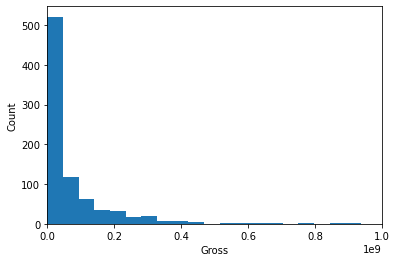

In [125]:
# Histogram of Gross
plt.hist(Gross_Revenue, density=False, bins=20)
plt.xlim(0, 1000000000)
plt.ylabel('Count')
plt.xlabel('Gross');

In [126]:
# Convert Released Year to integer
IMDB_df['Released_Year'] = IMDB_df['Released_Year'].astype('int32')

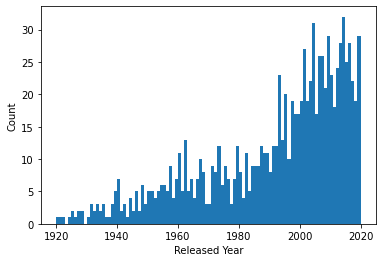

In [127]:
# Histogram of Released Year
plt.hist(IMDB_df.Released_Year, density=False, bins=100)
plt.ylabel('Count')
plt.xlabel('Released Year');

# Descriptive Statistics

In [128]:
# Find the mean
IMDB_df.mean()

C:\Users\Alexa\AppData\Local\Temp/ipykernel_15140/3733160596.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  IMDB_df.mean()


Released_Year    1991.22100
Runtime           122.89100
IMDB_Rating         7.94930
Meta_score         77.97153
dtype: float64

In [148]:
Gross_Revenue.mean()

68034750.87364621

In [129]:
IMDB_df.mode()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,Director,Gross
0,Drishyam,2014.0,100,7.7,76.0,Alfred Hitchcock,4360000
1,NaN,NaN,130,NaN,NaN,NaN,NaN


In [149]:
Gross_Revenue.mode()

0    4360000
dtype: int32

In [130]:
IMDB_df.std()

C:\Users\Alexa\AppData\Local\Temp/ipykernel_15140/3285583321.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  IMDB_df.std()


Released_Year    23.285669
Runtime          28.093671
IMDB_Rating       0.275491
Meta_score       12.376099
dtype: float64

In [150]:
Gross_Revenue.std()

109750043.19218516

# Comparing Two Scenarios

In [131]:
# Create new data frames for above and below two hour runtime
IMDB_long_df = IMDB_df[IMDB_df['Runtime']> 120]
IMDB_short_df = IMDB_df[IMDB_df['Runtime']< 120]

In [132]:
# Create PMFs
long_pmf = thinkstats2.Pmf(IMDB_long_df.IMDB_Rating, label='>120 Mins')
short_pmf = thinkstats2.Pmf(IMDB_short_df.IMDB_Rating, label='<120 Mins')

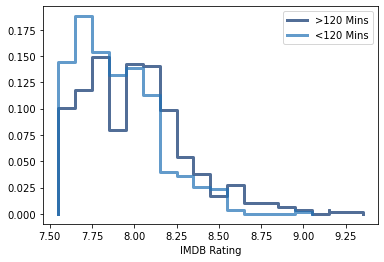

<Figure size 576x432 with 0 Axes>

In [133]:
# Plot PMFs
thinkplot.Pmfs([long_pmf, short_pmf])
thinkplot.Show(xlabel='IMDB Rating')

The probability mass function (PMF) maps the values of IMDB Rating to its probability. I broke apart the data to demonstrate the differences between "short" movies with run time lengths less than two hours or one hundred and twenty minutes and "long" movies with run time lengths greater than two hours or one hundred and twenty minutes. Based on the above PDF, longer movies tend to score better IMDB scores than shorter movies.

# CDF of One Variable

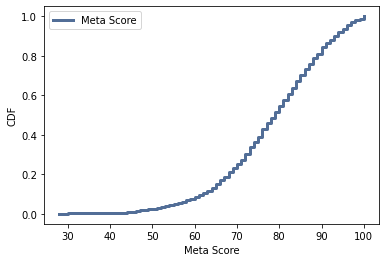

<Figure size 576x432 with 0 Axes>

In [134]:
cdf = thinkstats2.Cdf(IMDB_df.Meta_score, label="Meta Score")
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Meta Score', ylabel='CDF')

The cumulative distribution function (CDF) maps a value to its percentile rank. The above CDF represents movie Meta Scores. Based on the CDF, approximately 50% of the movies on the IMDB top 1000 list score above an 80 meta score.

# Analytical Distribution

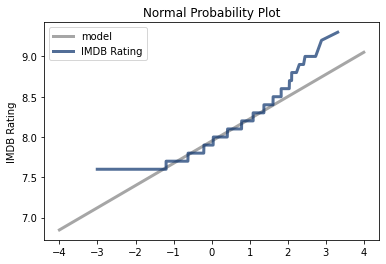

<Figure size 576x432 with 0 Axes>

In [151]:
def MakeNormalPlot(df):
    mean = df.mean()
    std = df.std()
    xs = [-4,4]
    fxs,fyx = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fyx, color='gray', label='model')
    xs, ys = thinkstats2.NormalProbability(df)
    thinkplot.Plot(xs, ys, label='IMDB Rating')
    thinkplot.Show(ylabel='IMDB Rating', title='Normal Probability Plot')
MakeNormalPlot(IMDB_df.IMDB_Rating)

The curve matches the model near the mean and deviates in the tails. 

# Scatter Plots Comparing Two Variables

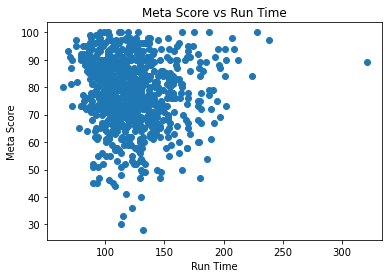

In [136]:
plt.scatter(IMDB_df.Runtime, IMDB_df.Meta_score)
plt.xlabel('Run Time')
plt.ylabel('Meta Score')
plt.title('Meta Score vs Run Time');

In [137]:
IMDB_df['Runtime'].corr(IMDB_df['Meta_score'])

-0.031451971885030836

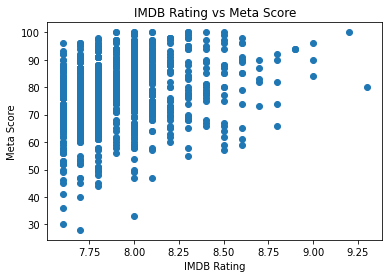

In [138]:
plt.scatter(IMDB_df.IMDB_Rating, IMDB_df.Meta_score)
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.title('IMDB Rating vs Meta Score');

In [139]:
IMDB_df['Meta_score'].corr(IMDB_df['IMDB_Rating'])

0.26853084455955556

# Test Hypothesis

In [143]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

# To test the difference in Runtime length
data = IMDB_long_df.IMDB_Rating, IMDB_short_df.IMDB_Rating
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

Testing the difference in means between two groups. This tests to see if the effects of run time and IMDB rating are statistically significant. We take the values for long movies and short movies to shuffle them. By extracting the values as NumPy arrays and passing through DiffMeansPermute, I am able to calculate the p-value. The result is a p-value of 0.0, which is statistically significant.

# Regression Analysis

In [146]:
model = smf.ols('Meta_score ~ Runtime + IMDB_Rating', data=IMDB_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Meta_score   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     37.66
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.16e-16
Time:                        15:03:19   Log-Likelihood:                -3280.3
No. Observations:                 843   AIC:                             6567.
Df Residuals:                     840   BIC:                             6581.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -18.0037     11.487     -1.567      0.117     -40.550       4.543
Runtime        -0.0477      0.016     -3.054      0.002      -0.078      -0.017
IMDB_Rating    12.8357      1.488      8.627      0.000       9.915      15.756
==============================================================================
Omnibus:                       51.857   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.013
Skew:                          -0.624   Prob(JB):                     9.29e-14
Kurtosis:                       3.388   Cond. No.                     3.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R squared value of 0.082 indicates that approximately eight percent of my variability can be explained by the model.